# Feature Engineering & Preprocessing

## Objective
The objective of this notebook is to prepare the dataset for model training by handling missing values, scaling numerical features, and splitting the data into training and testing sets.


In [1]:
import pandas as pd
import numpy as np


In [4]:
file_path = '/content/drive/MyDrive/House Price India.csv'
data = pd.read_csv(file_path)

In [5]:
data.isnull().sum()

,0
id,0
Date,0
No of bedrooms,0
No of bathrooms,0
living area,0
lot area,0
No of floors,0
waterfront present,0
No of views,0
house condition,0


In [16]:
data.duplicated().sum()

np.int64(2)

In [17]:
data.drop_duplicates(inplace=True)

In [18]:
data["Total floor area"] = data['house area(excluding basement)'] + data['Area of the basement']


In [19]:
data.drop(columns={'house area(excluding basement)', 'Area of the basement'}, inplace=True)

In [20]:
data['Total lot area']=data['lot area'] + data['lot_area_renov']

In [21]:
data.head()

,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,No of views,house condition,house grade,Built Year,Renovation Year,Lattitude,Longitude,living_area_renov,lot_area_renov,Price,Total floor area,Total lot area
0,4,2.50,2920,4000,1.5,0,0,5,8,1909,0,52.8878,-114.470,2470,4000,1400000,2920,8000
1,5,2.75,2910,9480,1.5,0,0,3,8,1939,0,52.8852,-114.468,2940,6600,1200000,2910,16080
2,4,2.50,3310,42998,2.0,0,0,3,9,2001,0,52.9532,-114.321,3350,42847,838000,3310,85845
3,3,2.00,2710,4500,1.5,0,0,4,8,1929,0,52.9047,-114.485,2060,4500,805000,2710,9000
4,3,2.50,2600,4750,1.0,0,0,4,9,1951,0,52.9133,-114.590,2380,4750,790000,2600,9500


In [22]:
data.drop(columns=['lot area', 'lot_area_renov'], inplace=True)

In [23]:
data.columns.value_counts().sum()

np.int64(16)

In [14]:
cols_to_drop = [
    "id",
    "Date",
    "Postal Code",
    "Distance from the airport",
    "No of schools nearby"
]

data = data.drop(columns=cols_to_drop)


In [24]:
data.head()

,No of bedrooms,No of bathrooms,living area,No of floors,waterfront present,No of views,house condition,house grade,Built Year,Renovation Year,Lattitude,Longitude,living_area_renov,Price,Total floor area,Total lot area
0,4,2.50,2920,1.5,0,0,5,8,1909,0,52.8878,-114.470,2470,1400000,2920,8000
1,5,2.75,2910,1.5,0,0,3,8,1939,0,52.8852,-114.468,2940,1200000,2910,16080
2,4,2.50,3310,2.0,0,0,3,9,2001,0,52.9532,-114.321,3350,838000,3310,85845
3,3,2.00,2710,1.5,0,0,4,8,1929,0,52.9047,-114.485,2060,805000,2710,9000
4,3,2.50,2600,1.0,0,0,4,9,1951,0,52.9133,-114.590,2380,790000,2600,9500


In [97]:
data['waterfront present'].value_counts()

,count
waterfront present,
0,14507
1,112


In [99]:
data['No of floors'].value_counts()

,count
No of floors,
1.0,7103
2.0,5665
1.5,1311
3.0,418
2.5,118
3.5,4


In [102]:
data['No of views'].value_counts()

,count
No of views,
0,13198
2,636
3,351
1,219
4,215


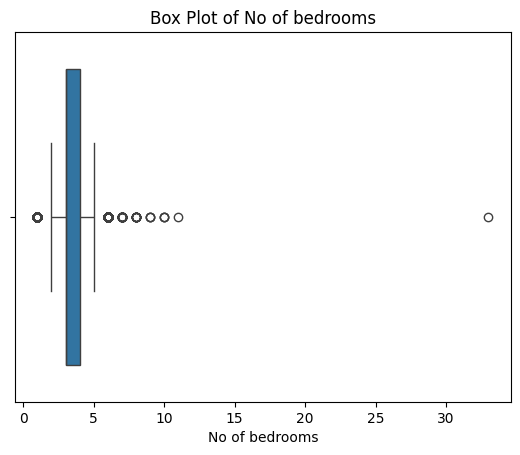

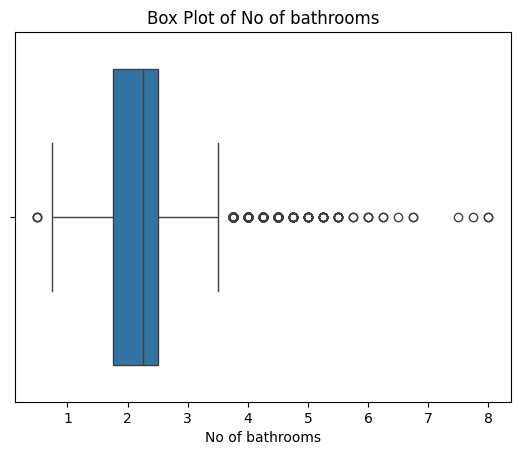

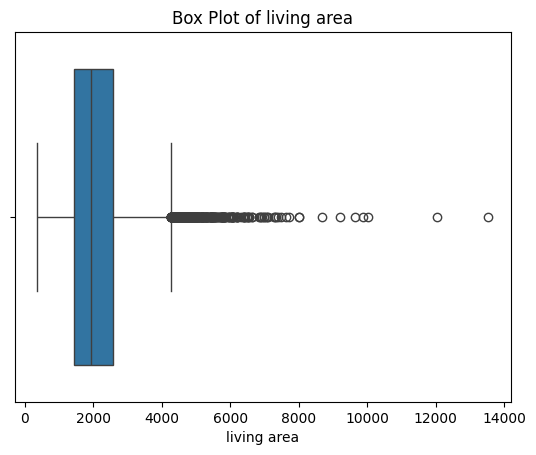

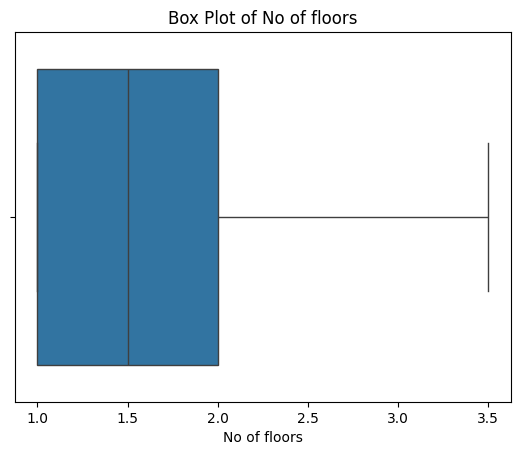

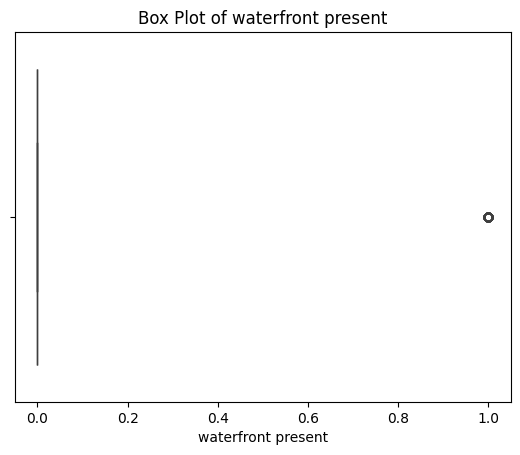

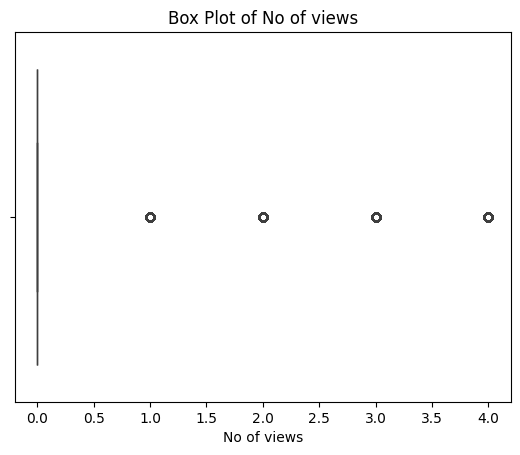

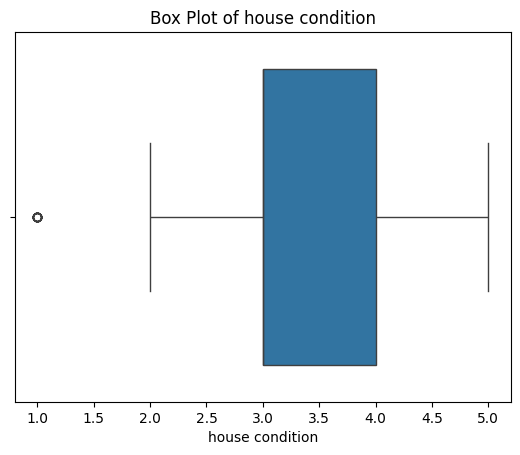

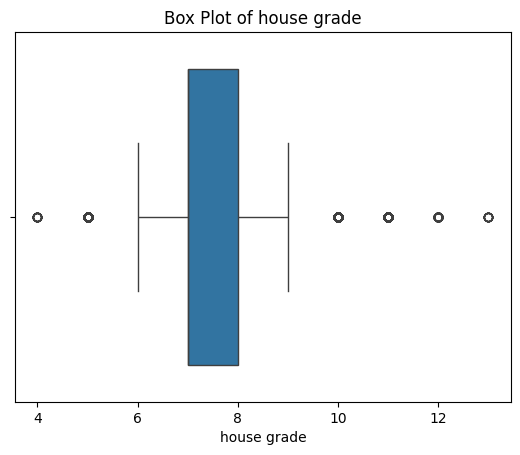

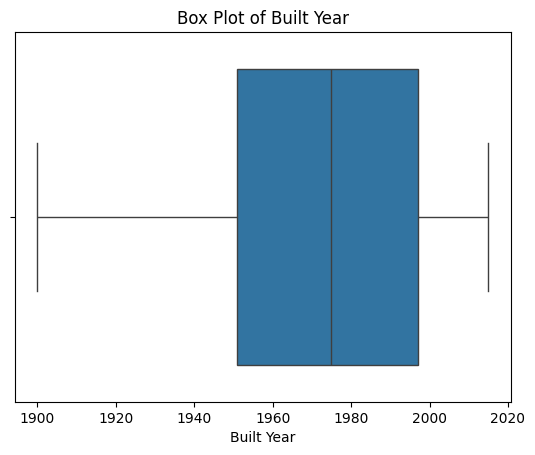

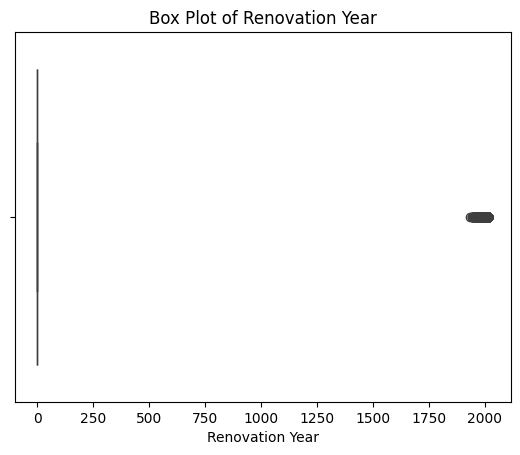

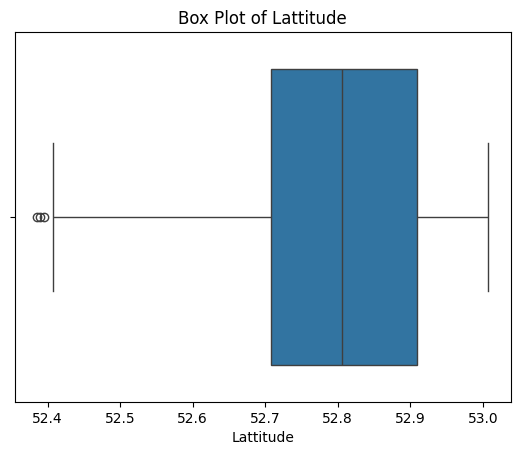

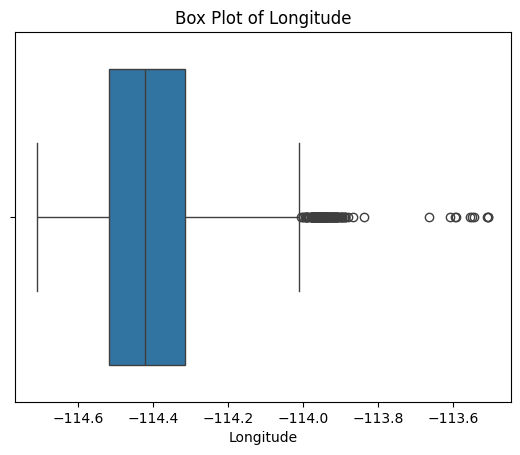

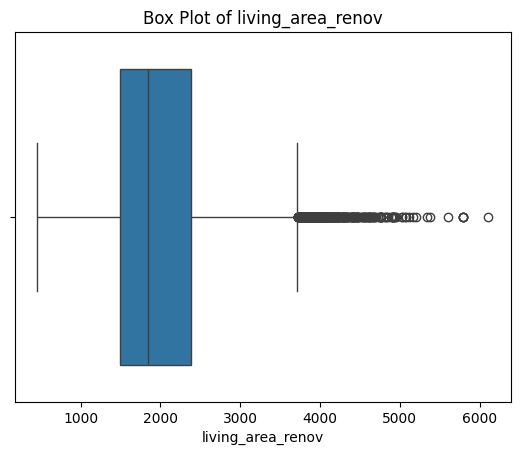

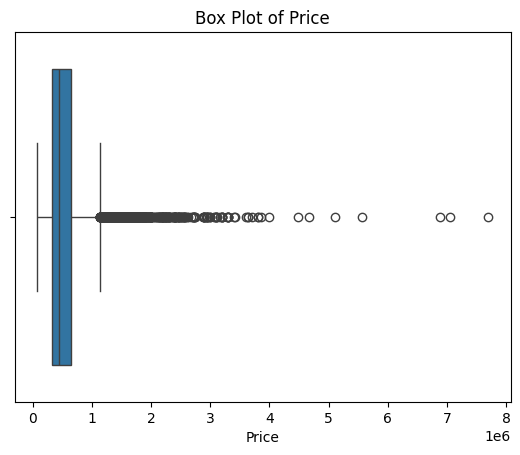

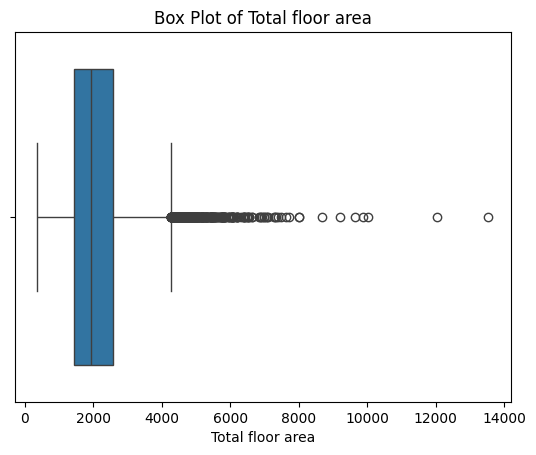

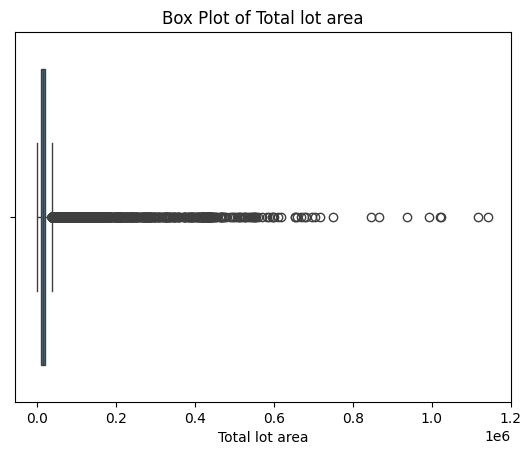

In [106]:
for col in data.columns:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

In [8]:
def count_outliers_iqr(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers.shape[0]


outlier_counts = {}

for col in data.columns:
    outlier_counts[col] = count_outliers_iqr(data, col)

outlier_counts


{'id': 0,
 'Date': 0,
 'No of bedrooms': 361,
 'No of bathrooms': 379,
 'living area': 395,
 'lot area': 1652,
 'No of floors': 0,
 'waterfront present': 112,
 'No of views': 1421,
 'house condition': 18,
 'house grade': 1319,
 'house area(excluding basement)': 402,
 'Area of the basement': 287,
 'Built Year': 0,
 'Renovation Year': 666,
 'Postal Code': 0,
 'Lattitude': 3,
 'Longitude': 184,
 'living_area_renov': 338,
 'lot_area_renov': 1517,
 'No of schools nearby': 0,
 'Distance from the airport': 0,
 'Price': 760}

In [25]:
data.to_csv(
    '/content/drive/MyDrive/House Price cleaned.csv',
    index=False
)


### Saving Clean Dataset

- After final feature selection and cleaning, the dataset was saved in the processed data folder.
- No scaling or model-specific transformations were applied at this stage.
- This cleaned dataset serves as the input for model training.
